In [1]:
import pandas as pd
import numpy as np
import os
import config
from joblib import dump, load
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import wilcoxon, kendalltau
from utils import plot_longitudinal, get_diversity

# Compute GMHI2 scores

In [2]:
study = "P90"

In [3]:
gmhi2 = load(os.path.join(config.MODEL_DIR, "gmhi2_model.joblib"))
gmhi2

LogisticRegression(C=0.03, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [4]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features_val.csv"), index_col=[0, 1]).loc[study]
X.head()

k__Archaea  k__Archaea|p__Euryarchaeota  \
Sample Accession                                            
SAMN16701456             0.0                          0.0   
SAMN16701455             0.0                          0.0   
SAMN16701454             0.0                          0.0   
SAMN16701453             0.0                          0.0   
SAMN16701452             0.0                          0.0   

                  k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Sample Accession                                                   
SAMN16701456                                                 0.0   
SAMN16701455                                                 0.0   
SAMN16701454                                                 0.0   
SAMN16701453                                                 0.0   
SAMN16701452                                                 0.0   

                  k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Sample Accession                                                                         
SAMN16701456                                                    0.0                      
SAMN16701455                                                    0.0                      
SAMN16701454                                                    0.0                      
SAMN16701453                                                    0.0                      
SAMN16701452                                                    0.0                      

                  k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
Sample Accession                                                                                                
SAMN16701456                                                    0.0                                             
SAMN16701455                                                    0.0                                             
SAMN16701454                                                    0.0                                             
SAMN16701453                                                    0.0                                             
SAMN16701452                                                    0.0                                             

                  k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
Sample Accession                                                                                                                      
SAMN16701456                                                    0.0                                                                   
SAMN16701455                                                    0.0                                                                   
SAMN16701454                                                    0.0                                                                   
SAMN16701453                                                    0.0                                                                   
SAMN16701452                                                    0.0                                                                   

                  k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Sample Accession                                                                                                                                                    
SAMN16701456                                                    0.0                                                                                                 
SAMN16701455                                                    0.0                                                                                                 
SAMN16701454                                                    0.0                 

In [5]:
meta = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata_val.csv"), index_col=[0, 1, 2]).loc[study]
meta["GMHI2"] = gmhi2.decision_function(X > config.PRESENCE_CUTOFF)
meta.index = meta.index.get_level_values(1)
meta.head()

health_status/host_diet timepoint     GMHI2
Subject_ID                                            
9016                           EEN        12 -0.428345
9016                           EEN        11 -0.424356
9016                           EEN        10 -1.038320
9016                           EEN         9 -0.002693
9016                           EEN         8  0.126793

# Compute other indices

In [6]:
np.unique(meta["timepoint"], return_counts=True)

(array(['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5',
        '6', '7', '8', '9', 'PS'], dtype=object),
 array([18, 22, 28, 26, 27, 28, 24, 29, 25, 26, 29, 26, 29, 27, 18, 27, 19]))

In [7]:
for diet in meta["health_status/host_diet"].unique():
    d = meta[meta["health_status/host_diet"] == diet]
    s = (d["timepoint"] == "0").sum()
    print(diet)
    print(s)

EEN
9
Omnivore
9
Vegan
0


## vegan group doesn't have any day zero because they did not have a dietary intervention

In [8]:
meta = get_diversity(meta, X)
meta.head()

/Users/daniel/opt/anaconda3/envs/gmwi2_analysis/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


health_status/host_diet timepoint     GMHI2  Species Richness  \
Subject_ID                                                                 
9016                           EEN        12 -0.428345                19   
9016                           EEN        11 -0.424356                15   
9016                           EEN        10 -1.038320                18   
9016                           EEN         9 -0.002693                 2   
9016                           EEN         8  0.126793                 1   

            Shannon Diversity  Simpson Diversity  
Subject_ID                                        
9016                 1.834157           0.204109  
9016                 1.508526           0.310608  
9016                 1.834897           0.219087  
9016                 0.426438           0.015682  
9016                 0.291104           0.024803

# Plot stuff now 

In [9]:
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
rc("svg", fonttype="none") 

In [10]:
meta["timepoint_plot"] = [16 if time == "PS" else int(time) for time in meta["timepoint"]]
meta.head()

health_status/host_diet timepoint     GMHI2  Species Richness  \
Subject_ID                                                                 
9016                           EEN        12 -0.428345                19   
9016                           EEN        11 -0.424356                15   
9016                           EEN        10 -1.038320                18   
9016                           EEN         9 -0.002693                 2   
9016                           EEN         8  0.126793                 1   

            Shannon Diversity  Simpson Diversity  timepoint_plot  
Subject_ID                                                        
9016                 1.834157           0.204109              12  
9016                 1.508526           0.310608              11  
9016                 1.834897           0.219087              10  
9016                 0.426438           0.015682               9  
9016                 0.291104           0.024803               8

In [11]:
timepoints_sorted = sorted(list(meta["timepoint"].unique()), key=lambda x : 16 if x == "PS" else int(x))
timepoints_sorted

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 'PS']

In [12]:
indices = ["GMHI2", "Species Richness", "Shannon Diversity", "Simpson Diversity"]

In [13]:
# only keep timepoints before intervention
meta = meta.iloc[[not time == "PS" and int(time) <= 6 for time in meta['timepoint']]]
timepoints_sorted = timepoints_sorted[:7]

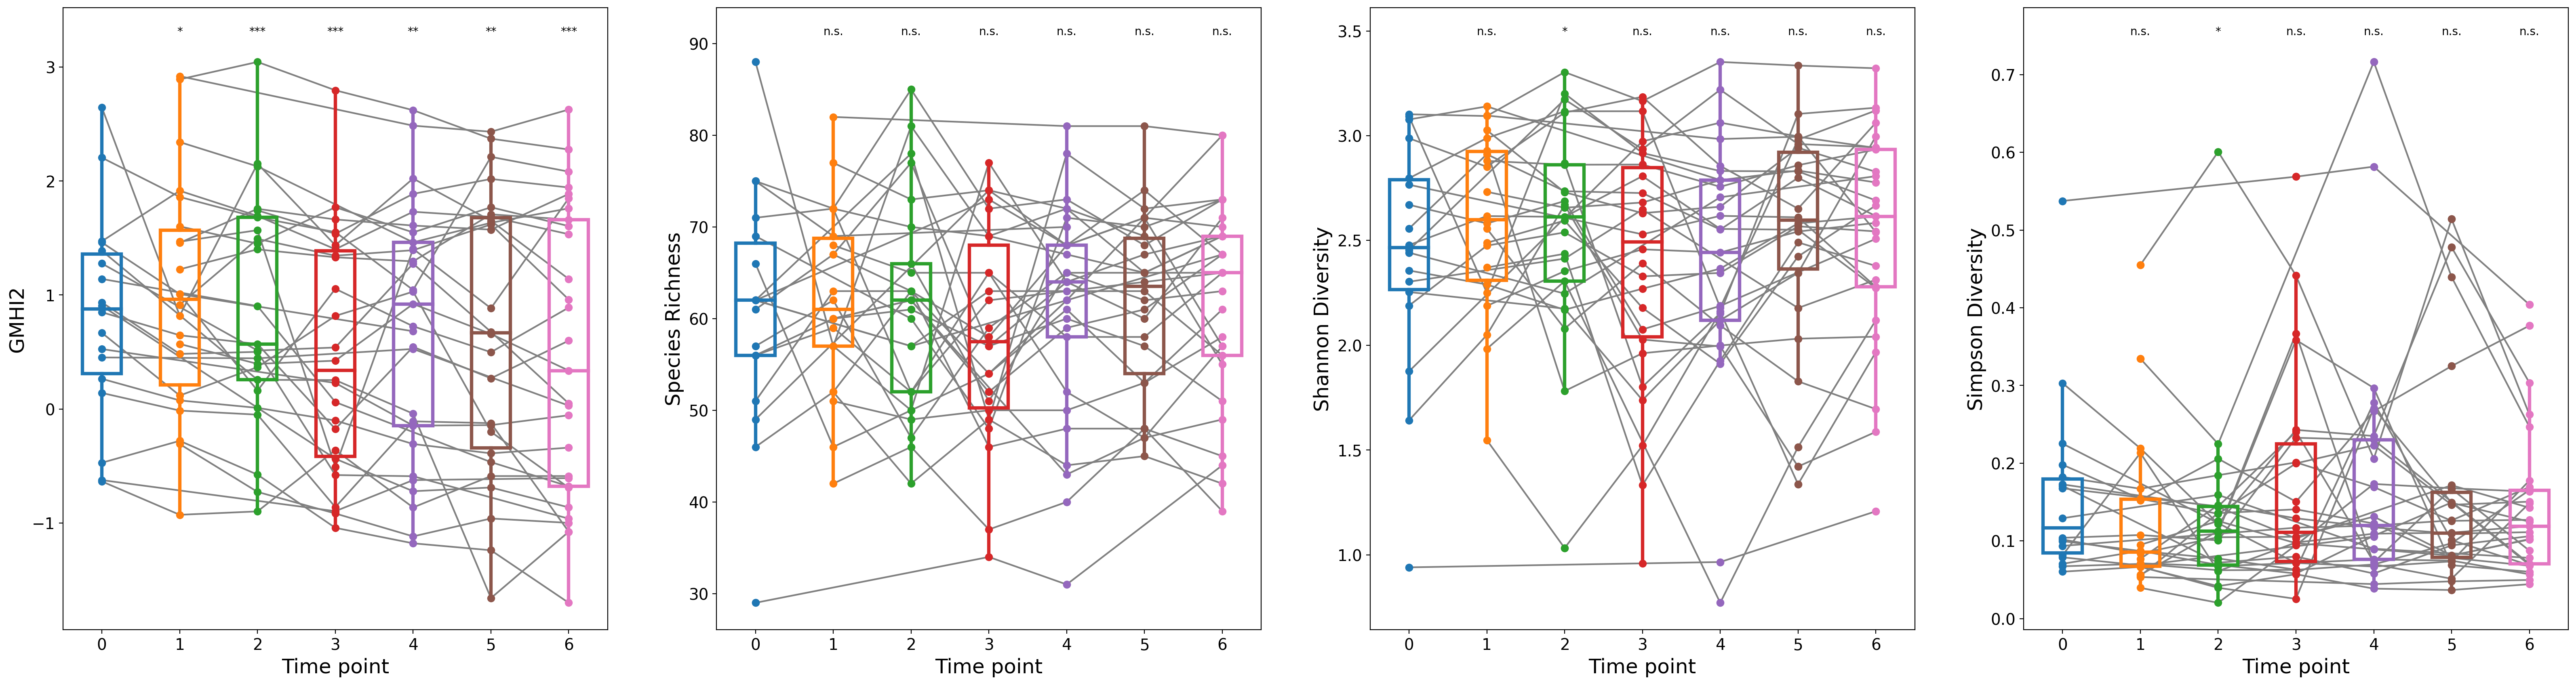

In [14]:
import warnings
warnings.filterwarnings('ignore')

plot_longitudinal(meta, indices, timepoints_sorted, study, stars=True)

In [32]:
def plot_longitudinal(meta, indices, timepoints_sorted, study, stars=False, show_tau=False, alternative="two-sided"):
    """
    meta is a df that has columns: ["timepoint", "timepoint_plot", index]
    """
    fig, axs = plt.subplots(ncols=len(indices), figsize=(10 * len(indices), 6), dpi=200)
    for index, ax in zip(indices, axs):
        # plot each subject's longitudinal line
        subjects = np.unique(meta.index)
        for subject in subjects:
            df = meta.loc[[subject]].copy()
            df = df.sort_values("timepoint_plot")
            ax.plot(df["timepoint_plot"] + (1 if "Vegan" in study else 0), df[index], c="#c2b59b", zorder=0, linewidth=2)
        ax.set_ylabel(index, fontsize=18)
        ax.set_xlabel("Time point", fontsize=18)
        
        colors = ["#a285b8", "#bdb8d9", "#cce6c4", "#fcf6b5", "#fbb462", "#f9cee1", "#f47f71"]
        
        # compute significance from baseline for each timepoint
        for i, time in enumerate(timepoints_sorted):
            data = meta[meta["timepoint"] == time][index]
            sc = ax.scatter(np.ones(data.shape[0]) * i, data, c="white", edgecolor="k", zorder=3)
#             sc = ax.scatter(np.ones(data.shape[0]) * i, data)
            c = colors[i]
            width = 1.0
            bp = ax.boxplot(data, positions=[i], patch_artist=True, widths=[0.5],
                boxprops=dict(facecolor=c, color="k", linewidth=width, alpha=0.5),
                capprops=dict(color="k", linewidth=0),
                whiskerprops=dict(color="k", linewidth=width),
                flierprops=dict(color="k", markeredgecolor="k", linewidth=width),
                medianprops=dict(color="#7e2718", linewidth=3),
                            )

        ran = meta[index].max() - meta[index].min()

        y = meta[index].max() + ran * 0.05
        y2 = meta[index].max() + ran * 0.1

        baseline = timepoints_sorted[0]
        baseline_df = meta[meta["timepoint"] == baseline]
        for i, timepoint in enumerate(timepoints_sorted):
            if i == 0: continue
            timepoint_df = meta[meta["timepoint"] == timepoint]
            subjects_in_both = set(baseline_df.index) & set(timepoint_df.index)
            timepoint_df = timepoint_df.loc[subjects_in_both]
            baseline_df_curr = baseline_df.loc[subjects_in_both]
            if timepoint_df.shape[0] == 0 or baseline_df_curr.shape[0] == 0:
                wilcoxon_p = 1
                tau_p = 1
            else:
                stat = wilcoxon(baseline_df_curr[index], timepoint_df[index], alternative=alternative)
                wilcoxon_p = stat.pvalue
                stat = kendalltau(baseline_df_curr[index], timepoint_df[index])
                tau, tau_p = stat
                
            x = i
            
            if stars:
                text = "****" if wilcoxon_p <= 0.0001 else "***" if wilcoxon_p <= 0.001 else "**" if wilcoxon_p <= 0.01 else "*" if wilcoxon_p <= 0.05 else "n.s."
            else:
                text = "$P = " + '%.2g' % wilcoxon_p + "$" if wilcoxon_p < 0.05 else "n.s."
#                 text = "$P = " + '%.2g' % wilcoxon_p + "$"
            ax.text(x, y, text, ha="center", fontsize=14)
            
            if show_tau and tau_p < 0.05:
                ax.text(x, y2, r"$\tau$ = " + '%.2g' % tau, ha="center", fontsize=14)

        if timepoints_sorted[0] != '0':
            timepoints_sorted = ['0'] + timepoints_sorted
        ax.set_xticks(ticks=list(range(len(timepoints_sorted))))
        
        ax.set_xticklabels(labels=[t + f"\n(n={meta[meta['timepoint'] == str(t)].shape[0]})" for t in timepoints_sorted], fontsize=14)
        
        ax.tick_params(axis="y", labelsize=14)
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom, ran * 0.05 + (y2 if show_tau else y))
        ax.grid(axis="y", linestyle="--", dashes=(5, 5))
        
    plt.savefig(os.path.join(config.FIGURE_DIR, study + ".pdf"))

EEN
Omnivore
Vegan


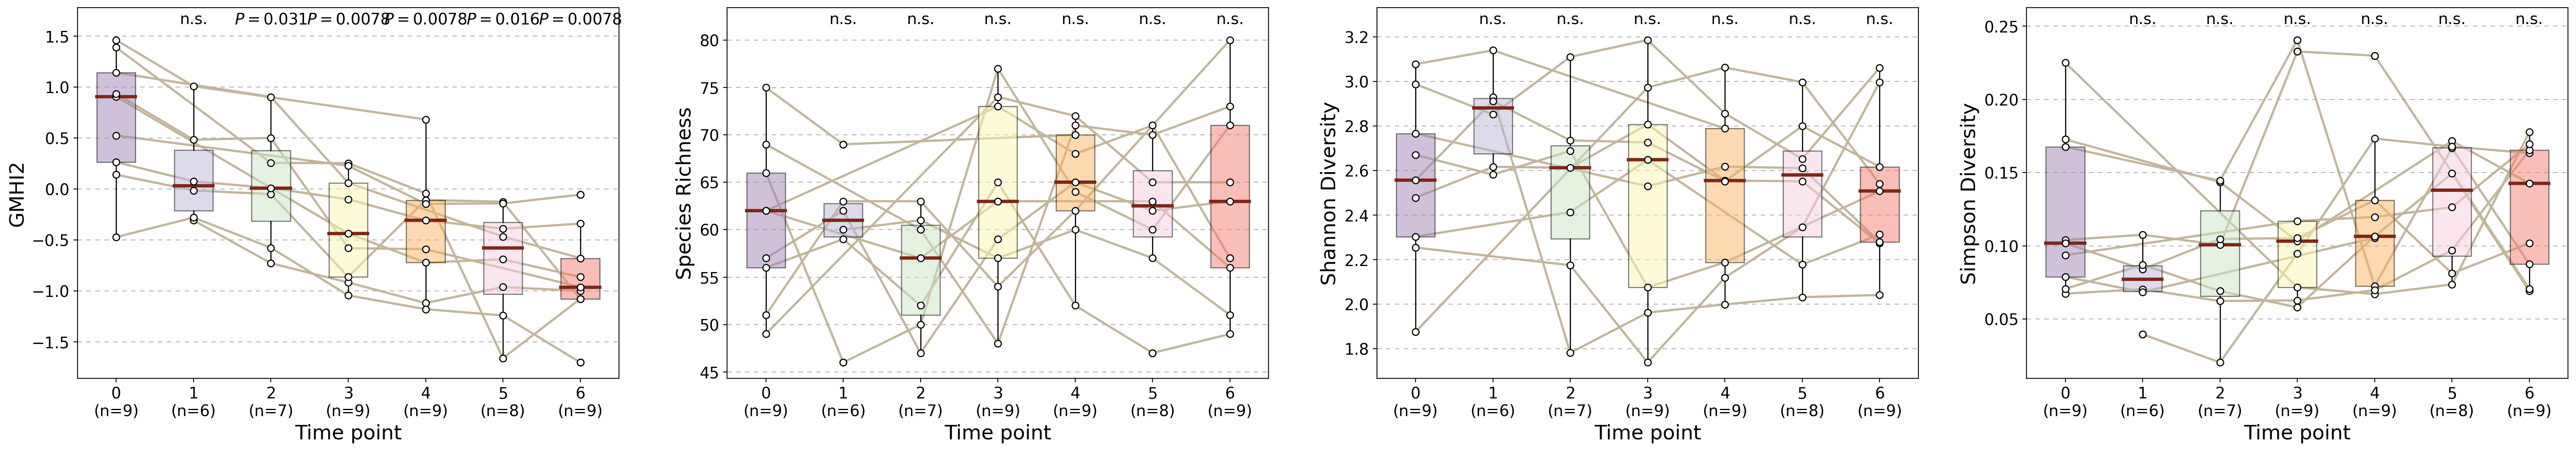

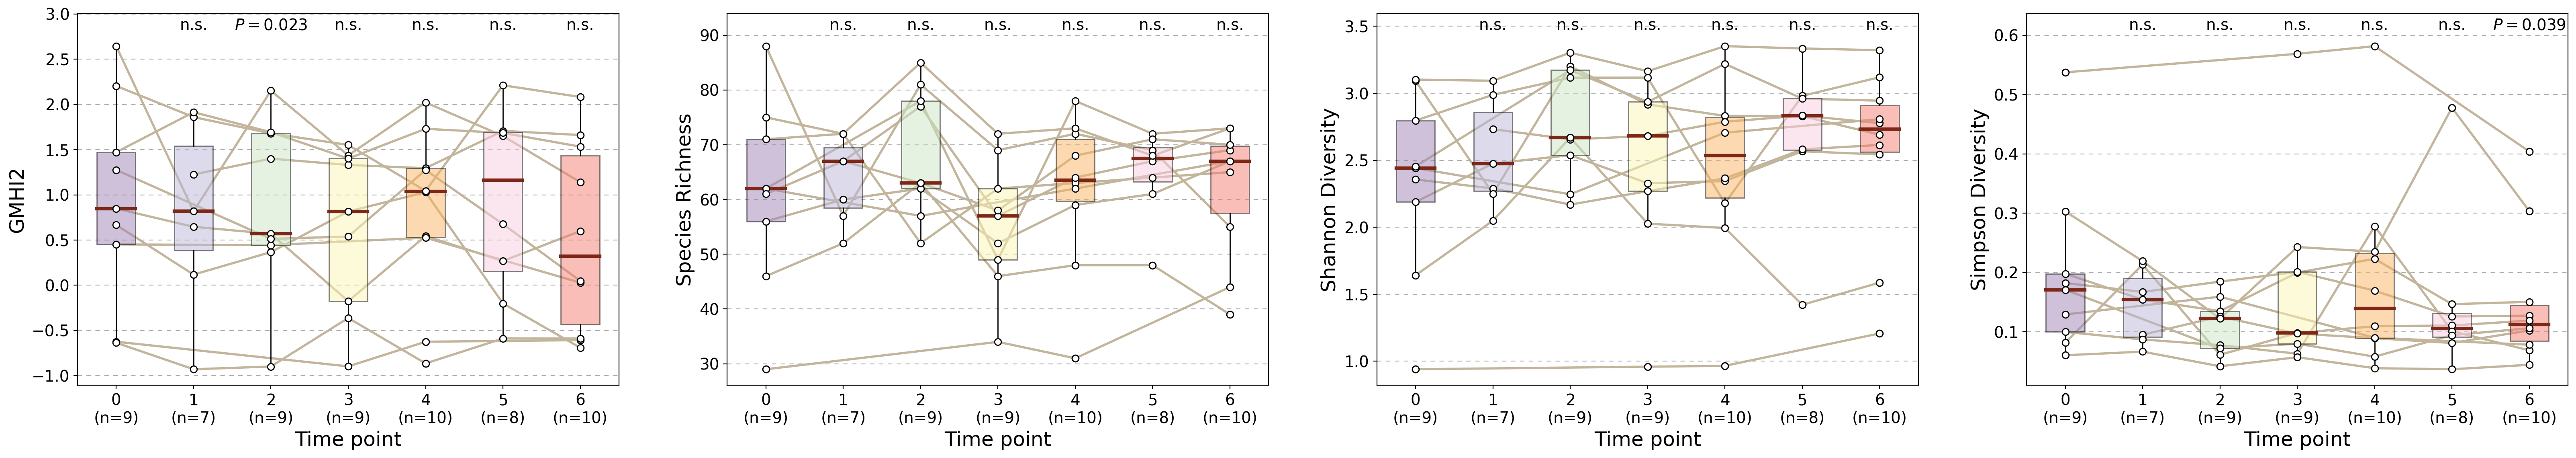

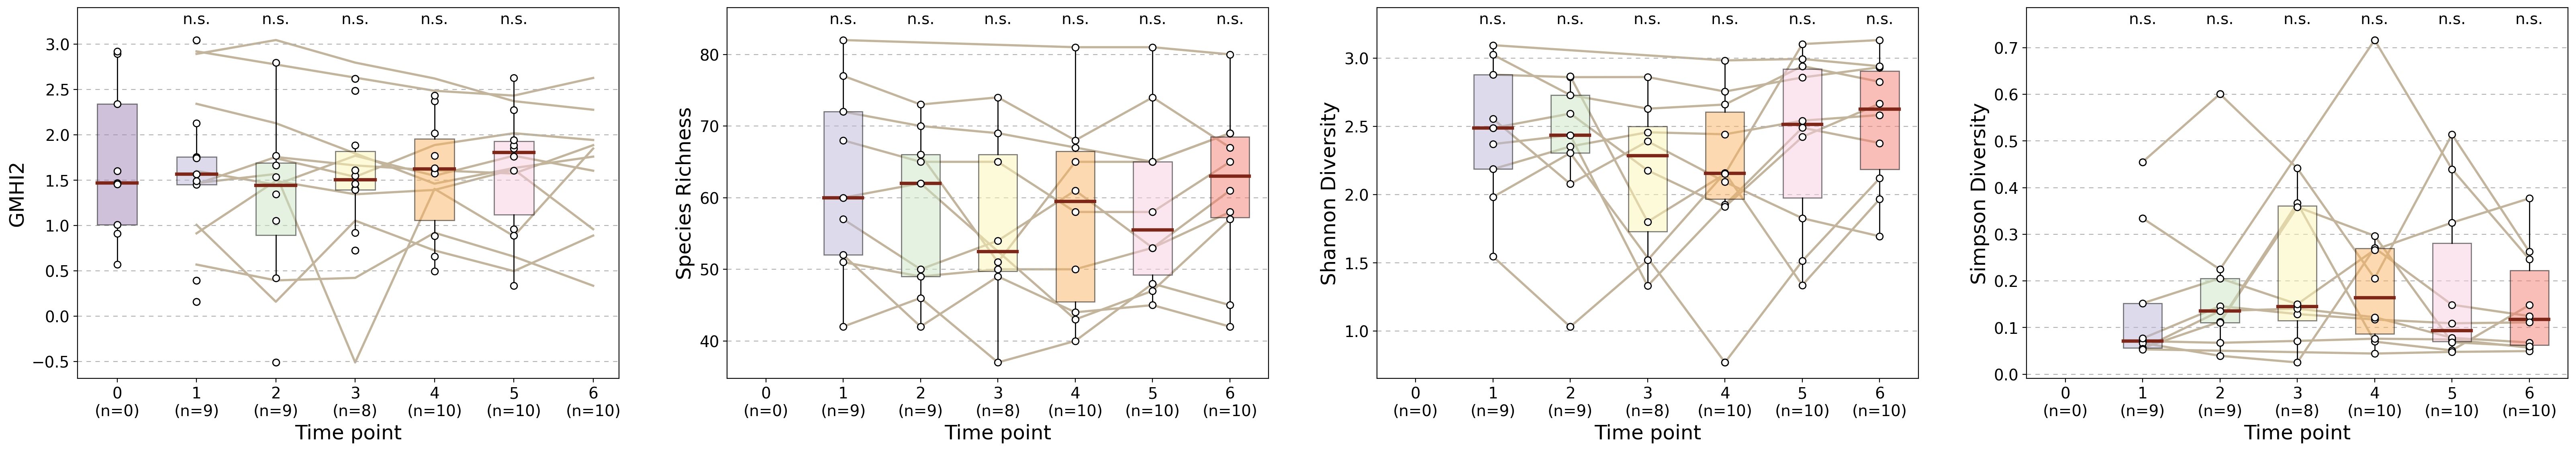

In [34]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

for diet in meta["health_status/host_diet"].unique():
    print(diet)
    timepoints_sorted_curr = timepoints_sorted
    meta_curr = meta.copy()
    
    # because vegans don't have baseline samples for some reason
    if diet == "Vegan":
        timepoints_sorted_curr = timepoints_sorted[1:]
        meta_curr['timepoint_plot'] -= 1
        
    plot_longitudinal(meta_curr[meta_curr["health_status/host_diet"] == diet], indices, timepoints_sorted_curr, study + "_" + diet, stars=False)

# Sanity check stats

In [16]:
timepoint_info = meta[["health_status/host_diet", "timepoint", "GMHI2"]]
timepoint_info

health_status/host_diet timepoint     GMHI2
Subject_ID                                            
9003                           EEN         2  0.501042
9016                           EEN         6 -0.678862
9016                           EEN         5 -0.466407
9016                           EEN         3  0.060215
9016                           EEN         2  0.902886
...                            ...       ...       ...
9017                         Vegan         4  0.725676
9017                         Vegan         3  1.054331
9017                         Vegan         2  0.160644
9003                           EEN         3 -0.579882
9017                         Vegan         1  1.008245

[175 rows x 3 columns]

In [17]:
timepoint_info.to_csv(os.path.join(config.FIG_DATA_DIR, "2e_diet.csv"))

In [18]:
# sanity check the plots

for group in ["EEN", "Omnivore"]:
    for index in ["GMHI2", "Species Richness", "Shannon Diversity", "Simpson Diversity"]:
        for t in ["1", "2", "3", "4", "5", "6"]:
            a = meta[(meta["timepoint"] == "0") & (meta["health_status/host_diet"] == group)].sort_index()[index]
            b = meta[(meta["timepoint"] == t) & (meta["health_status/host_diet"] == group)].sort_index()[index]
            both = set(a.index) & set(b.index)
            a = a.loc[both]
            b = b.loc[both]
            print(wilcoxon(a, b))
        print()
    print()

WilcoxonResult(statistic=3.0, pvalue=0.3125)
WilcoxonResult(statistic=0.0, pvalue=0.03125)
WilcoxonResult(statistic=0.0, pvalue=0.0078125)
WilcoxonResult(statistic=0.0, pvalue=0.0078125)
WilcoxonResult(statistic=0.0, pvalue=0.015625)
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

WilcoxonResult(statistic=7.0, pvalue=1.0)
WilcoxonResult(statistic=5.0, pvalue=0.3125)
WilcoxonResult(statistic=7.0, pvalue=0.1484375)
WilcoxonResult(statistic=8.5, pvalue=0.1953125)
WilcoxonResult(statistic=9.5, pvalue=0.46875)
WilcoxonResult(statistic=13.0, pvalue=0.546875)

WilcoxonResult(statistic=5.0, pvalue=0.625)
WilcoxonResult(statistic=2.0, pvalue=0.09375)
WilcoxonResult(statistic=16.0, pvalue=0.84375)
WilcoxonResult(statistic=10.0, pvalue=0.3125)
WilcoxonResult(statistic=13.0, pvalue=0.9375)
WilcoxonResult(statistic=15.0, pvalue=0.7421875)

WilcoxonResult(statistic=7.0, pvalue=1.0)
WilcoxonResult(statistic=2.0, pvalue=0.09375)
WilcoxonResult(statistic=18.0, pvalue=1.0)
WilcoxonResult(statistic=14.0

In [29]:
# for diet in timepoint_info["health_status/host_diet"].unique():
#     diet_df = timepoint_info[timepoint_info["health_status/host_diet"] == diet]
#     print(diet)
#     display(diet_df.groupby("timepoint").count())

In [30]:
timepoint_info

health_status/host_diet timepoint     GMHI2
Subject_ID                                            
9003                           EEN         2  0.501042
9016                           EEN         6 -0.678862
9016                           EEN         5 -0.466407
9016                           EEN         3  0.060215
9016                           EEN         2  0.902886
...                            ...       ...       ...
9017                         Vegan         4  0.725676
9017                         Vegan         3  1.054331
9017                         Vegan         2  0.160644
9003                           EEN         3 -0.579882
9017                         Vegan         1  1.008245

[175 rows x 3 columns]

In [43]:
GMHI2_pivot_dfs = {}

for d in timepoint_info["health_status/host_diet"].unique():
    diet_group = timepoint_info[timepoint_info["health_status/host_diet"] == d]
    diet_group = diet_group.reset_index()
    pivot = diet_group.pivot(index='Subject_ID', columns='timepoint', values='GMHI2')
    print(d)
    display(pivot)
    GMHI2_pivot_dfs[d] = pivot

EEN


timepoint          0         1         2         3         4         5  \
Subject_ID                                                               
9003        0.934426  0.483171  0.501042 -0.579882 -0.590184       NaN   
9009        0.904904       NaN       NaN -0.436784 -0.721706 -0.689257   
9013        1.387702       NaN  0.255849  0.253443 -0.041433 -1.659565   
9016        1.140669       NaN  0.902886  0.060215       NaN -0.466407   
9024       -0.471903 -0.279717 -0.576524 -1.043117 -1.178972 -1.239829   
9025        1.460757  1.008171       NaN       NaN  0.681860       NaN   
9029        0.264295  0.075001  0.009448 -0.101296 -0.307549 -0.389419   
9032        0.525299       NaN       NaN  0.228046 -0.146123 -0.141857   
9034        0.140343 -0.014197 -0.050024 -0.861731 -0.108678 -0.124536   
9038             NaN -0.308092 -0.727839 -0.917132 -1.118155 -0.961223   

timepoint          6  
Subject_ID            
9003       -0.962499  
9009       -0.863432  
9013       -1.077411  
9016       -0.678862  
9024       -1.700908  
9025             NaN  
9029       -0.339471  
9032       -0.055249  
9034       -1.077399  
9038       -0.999571

Omnivore


timepoint          0         1         2         3         4         5  \
Subject_ID                                                               
9005       -0.624316       NaN       NaN -0.896924 -0.624316       NaN   
9006        2.644752  0.818160  2.152580  1.436010  2.022025  1.651268   
9010        0.848681  0.646664  0.569761 -0.175209  0.544930  0.268744   
9015        0.667638  0.117959  0.367323  0.816199  1.029438 -0.200451   
9019        1.471713  1.914525  1.693162  1.401608  1.730396  1.685652   
9030        1.276027       NaN  0.512767  0.539340  1.275113  0.676703   
9033       -0.635841 -0.928667 -0.898821 -0.361708 -0.864141 -0.588794   
9036        0.451965       NaN  0.444466       NaN  0.526345       NaN   
9037        2.204736  1.860196  1.680101  1.552021  1.044046  2.212105   
9040             NaN  1.225472  1.400468  1.330980  1.294941  1.707590   

timepoint          6  
Subject_ID            
9005       -0.606735  
9006        1.140397  
9010        0.599365  
9015       -0.690844  
9019        1.533362  
9030        0.048330  
9033       -0.588794  
9036        0.029170  
9037        2.082471  
9040        1.661818

Vegan


timepoint          1         2         3         4         5         6
Subject_ID                                                            
9002        0.570197  0.395741  0.423497  0.921313  0.658110  0.336788
9004        0.914249  1.492233  1.345011  1.393006  1.618695  0.959955
9008        1.601854  1.450823  1.769725  1.549324  1.769725  1.604547
9014        1.467763  1.568665 -0.508536  1.404690  0.883808  1.849145
9017        1.008245  0.160644  1.054331  0.725676  0.497916  0.889765
9022             NaN  1.742370  1.536903  1.887333  2.017983  1.943300
9026        2.341891  2.128268       NaN  1.461936  1.633728  1.759971
9027        2.920040       NaN       NaN  2.485831  2.432542  2.627103
9031        1.457931  1.756060  1.662825  1.609255  1.573533  1.886233
9035        2.892237  3.044906  2.796273  2.621447  2.371359  2.276553

In [47]:
diet_GMHI2_scores = pd.concat(GMHI2_pivot_dfs, names=['Diet group'])
diet_GMHI2_scores.columns = ["Day " + col for col in diet_GMHI2_scores.columns]
diet_GMHI2_scores.to_csv(os.path.join(config.LOG_DIR, "diet_GMHI2.csv"))
diet_GMHI2_scores

Day 0     Day 1     Day 2     Day 3     Day 4  \
Diet group Subject_ID                                                     
EEN        9003        0.934426  0.483171  0.501042 -0.579882 -0.590184   
           9009        0.904904       NaN       NaN -0.436784 -0.721706   
           9013        1.387702       NaN  0.255849  0.253443 -0.041433   
           9016        1.140669       NaN  0.902886  0.060215       NaN   
           9024       -0.471903 -0.279717 -0.576524 -1.043117 -1.178972   
           9025        1.460757  1.008171       NaN       NaN  0.681860   
           9029        0.264295  0.075001  0.009448 -0.101296 -0.307549   
           9032        0.525299       NaN       NaN  0.228046 -0.146123   
           9034        0.140343 -0.014197 -0.050024 -0.861731 -0.108678   
           9038             NaN -0.308092 -0.727839 -0.917132 -1.118155   
Omnivore   9005       -0.624316       NaN       NaN -0.896924 -0.624316   
           9006        2.644752  0.818160  2.152580  1.436010  2.022025   
           9010        0.848681  0.646664  0.569761 -0.175209  0.544930   
           9015        0.667638  0.117959  0.367323  0.816199  1.029438   
           9019        1.471713  1.914525  1.693162  1.401608  1.730396   
           9030        1.276027       NaN  0.512767  0.539340  1.275113   
           9033       -0.635841 -0.928667 -0.898821 -0.361708 -0.864141   
           9036        0.451965       NaN  0.444466       NaN  0.526345   
           9037        2.204736  1.860196  1.680101  1.552021  1.044046   
           9040             NaN  1.225472  1.400468  1.330980  1.294941   
Vegan      9002             NaN  0.570197  0.395741  0.423497  0.921313   
           9004             NaN  0.914249  1.492233  1.345011  1.393006   
           9008             NaN  1.601854  1.450823  1.769725  1.549324   
           9014             NaN  1.467763  1.568665 -0.508536  1.404690   
           9017             NaN  1.008245  0.160644  1.054331  0.725676   
           9022             NaN       NaN  1.742370  1.536903  1.887333   
           9026             NaN  2.341891  2.128268       NaN  1.461936   
           9027             NaN  2.920040       NaN       NaN  2.485831   
           9031             NaN  1.457931  1.756060  1.662825  1.609255   
           9035             NaN  2.892237  3.044906  2.796273  2.621447   

                          Day 5     Day 6  
Diet group Subject_ID                      
EEN        9003             NaN -0.962499  
           9009       -0.689257 -0.863432  
           9013       -1.659565 -1.077411  
           9016       -0.466407 -0.678862  
           9024       -1.239829 -1.700908  
           9025             NaN       NaN  
           9029       -0.389419 -0.339471  
           9032       -0.141857 -0.055249  
           9034       -0.124536 -1.077399  
           9038       -0.961223 -0.999571  
Omnivore   9005             NaN -0.606735  
           9006        1.651268  1.140397  
           9010        0.268744  0.599365  
           9015       -0.200451 -0.690844  
           9019        1.685652  1.533362  
           9030        0.676703  0.048330  
           9033       -0.588794 -0.588794  
           9036             NaN  0.029170  
           9037        2.212105  2.082471  
           9040        1.707590  1.661818  
Vegan      9002        0.658110  0.336788  
           9004        1.618695  0.959955  
           9008        1.769725  1.604547  
           9014        0.883808  1.849145  
           9017        0.497916  0.889765  
           9022        2.017983  1.943300  
           9026        1.633728  1.759971  
           9027        2.432542  2.627103  
           9031        1.573533  1.886233  
           9035        2.371359  2.276553